# 双线性插值

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [18]:
src = cv2.imread('../datas/f2.jpg')
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
rgb_f = rgb.astype(np.float32)

In [37]:
def bilinear_interpolate(image, scale_factor):

    h, w= image.shape[0],image.shape[1]
    h2 = int(np.floor(h  * scale_factor))
    w2 = int(np.floor(w  * scale_factor))
    temp = np.zeros((h2, w2), np.uint8)
    x_ratio = float((w - 1)) / w2;
    y_ratio = float((h - 1)) / h2;
    for i in range(1, h2 - 1): 
        for j in range(1 ,w2 - 2):
            x = int(x_ratio * j)
            y = int(y_ratio * i)
            x_diff = (x_ratio * j) - x
            y_diff = (y_ratio * i) - y
            a = image[y, x] & 0xFF
            b = image[y + 1, x] & 0xFF
            c = image[y, x + 1] & 0xFF
            d = image[y + 1, x + 1] & 0xFF
            pixel = a * (1 - x_diff) * (1 - y_diff) + b * (x_diff) * (1-y_diff) + c * y_diff * (1 - x_diff)   + d * (x_diff * y_diff)
            #green = a[1] * (1 - x_diff) * (1 - y_diff) + b[1] * (x_diff) * (1-y_diff) + c[1] * y_diff * (1 - x_diff)   + d[1] * (x_diff * y_diff)
            #red = a[2] * (1 - x_diff) * (1 - y_diff) + b[2] * (x_diff) * (1-y_diff) + c[2] * y_diff * (1 - x_diff)   + d[2] * (x_diff * y_diff)
            temp[i, j] = pixel#(blue, green, red)

    return temp

In [38]:
dst = bilinear_interpolate(gray,2)

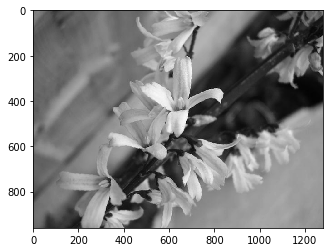

In [39]:
plt.imshow(dst,'gray')

In [46]:
def bilinear_interpolate_color(image, scale_factor):

    (h, w, channels) = image.shape
    h2 = int(np.floor(h  * scale_factor))
    w2 = int(np.floor(w  * scale_factor))
    temp = np.zeros((h2, w2,channels), np.uint8)
    x_ratio = float((w - 1)) / w2;
    y_ratio = float((h - 1)) / h2;
    for i in range(1, h2 - 1): 
        for j in range(1 ,w2 - 2):
            x = int(x_ratio * j)
            y = int(y_ratio * i)
            x_diff = (x_ratio * j) - x
            y_diff = (y_ratio * i) - y
            a = np.array(image[y, x]) & 0xFF
            b = np.array(image[y + 1, x]) & 0xFF
            c = np.array(image[y, x + 1]) & 0xFF
            d = np.array(image[y + 1, x + 1]) & 0xFF
            #red = a[0] * (1 - x_diff) * (1 - y_diff) + b[0] * (x_diff) * (1-y_diff) + c[0] * y_diff * (1 - x_diff)   + d[0] * (x_diff * y_diff)
            #green = a[1] * (1 - x_diff) * (1 - y_diff) + b[1] * (x_diff) * (1-y_diff) + c[1] * y_diff * (1 - x_diff)   + d[1] * (x_diff * y_diff)
            #blue = a[2] * (1 - x_diff) * (1 - y_diff) + b[2] * (x_diff) * (1-y_diff) + c[2] * y_diff * (1 - x_diff)   + d[2] * (x_diff * y_diff)
            pixel = a * (1 - x_diff) * (1 - y_diff) + b * (x_diff) * (1-y_diff) + c * y_diff * (1 - x_diff)   + d * (x_diff * y_diff)
            temp[i, j] = pixel.tolist()

    return temp

In [47]:
dst = bilinear_interpolate_color(rgb,1.5)

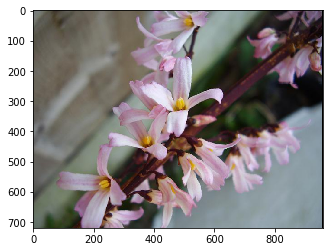

In [48]:
plt.imshow(dst)